<a href="https://colab.research.google.com/github/molinacle/desafio_latam/blob/main/Desaf%C3%ADo_Latam_Desaf%C3%ADo_5_Estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESAFÍO LATAM - DESAFÍO 5**
---

*   ALUMNO: SEBASTIÁN MOLINA
*   MODULO: ESTADÍSTICA DESCRIPTIVA Y PROBABILIDAD
*   CARRERA: DATA SCIENCE

###Experimento:###
Podemos registrar muchas características de una persona, y buscar ver si algunas influyen o no en otras. Realiza las siguientes actividades para verificarlo.
1. Considerando las variables earn, height y age, vamos a suponer que nuestro dataset fuera una población completa. (Prepara los datos adecuadamente).
-  a. Realiza 5 pruebas con muestras de tamaño n = 25, en cada caso, con niveles de significancia diferentes pero inferiores a 0,1, para confirmar o rechazar las siguientes hipótesis considerando las alternativas. Crea para ello una fórmula que reciba los parámetros adecuados y responda "con nivel de confianza del ...%, se acepta la hipótesis nula/alternativa".
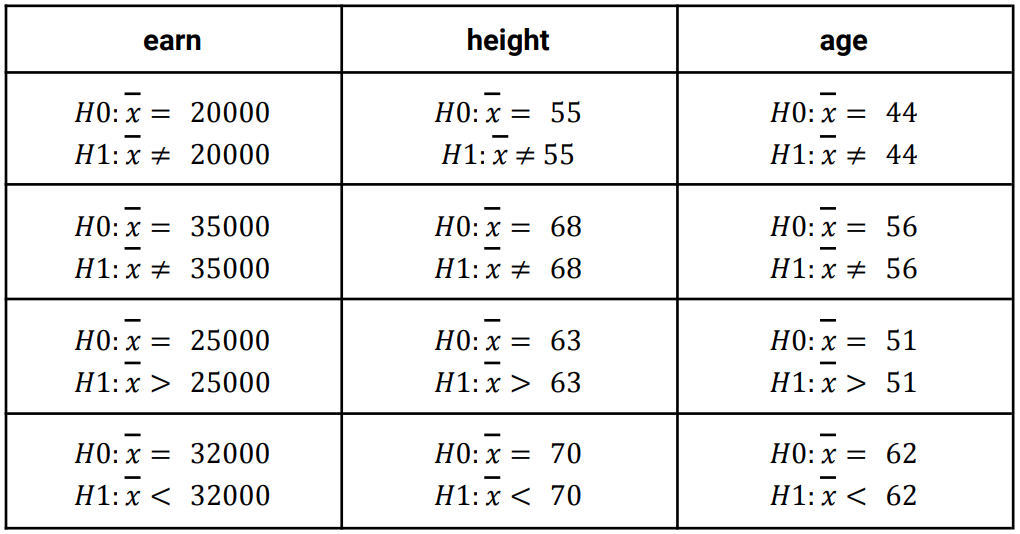

In [13]:
#Importación de librerías
import numpy as np
import pandas as pd
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats

# Cargar los datos
df = pd.read_csv("earnings.csv")
df.head()

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91


In [2]:
df.describe()

,height,weight,male,earn,earnk,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
count,1816.000000,1789.000000,1816.000000,1816.000000,1816.000000,1814.000000,1572.000000,1521.000000,1816.000000,1816.000000,1815.000000,1815.000000,1815.000000,1816.000000
mean,66.568833,156.305198,0.371696,21147.296256,21.147296,13.235391,13.608779,13.652202,5.303414,3.049009,1.745455,1.421488,1.421488,42.934471
std,3.831822,34.617059,0.483391,22531.765123,22.531765,2.556638,3.219372,3.250811,2.601104,2.316385,0.435725,2.157850,2.157850,17.161672
min,57.000000,80.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,18.000000
25%,64.000000,130.000000,0.000000,6000.000000,6.000000,12.000000,12.000000,12.000000,3.000000,1.000000,1.000000,0.000000,0.000000,29.000000
50%,66.000000,150.000000,0.000000,16000.000000,16.000000,12.000000,13.000000,13.000000,6.000000,2.000000,2.000000,0.000000,0.000000,39.000000
75%,69.250000,180.000000,1.000000,27000.000000,27.000000,15.000000,16.000000,16.000000,8.000000,5.000000,2.000000,2.000000,2.000000,56.000000
max,82.000000,342.000000,1.000000,400000.000000,400.000000,18.000000,99.000000,99.000000,8.000000,7.000000,2.000000,7.000000,7.000000,91.000000


- Ahora crearemos una función que permita al usuario final realizar una prueba de hipótesis en base al valor de los parámetros que defina.

In [3]:
def prueba_hipotesis_columna(df, columna, nivel_significancia, alternativa, n_muestra, H0):
    """
    Realiza pruebas de hipótesis para una columna específica del DataFrame.

    Parámetros:
        - df: el DataFrame que contiene los datos.
        - columna: el nombre de la columna para la cual se realizarán las pruebas de hipótesis.
        - nivel_significancia: el nivel de significancia deseado para las pruebas (debe ser un valor como "0.05").
        - alternativa: especifica la alternativa ('1' si H1 es distinta a H0, '2' si H1 es mayor a H0 y '3' si H1 es menor a H0).
        - n_muestra: corresponde al tamaño de la muestra.
        - H0: Corresponde al valor que es comparado en la prueba z

    Imprime:
        - Los principales elementos y el resultado de la prueba de hipótesis.
    """
    if alternativa == '2':
      alter = "larger"
      H1 = ">"
    elif alternativa == '3':
      alter = "smaller"
      H1 = "<"
    elif alternativa == '1':
      alter = "two-sided"
      H1 = "!="

    muestra_aleatoria = df[columna].sample(n=tamano_muestra)

    _, p_value = ztest(muestra_aleatoria, value=H0_value, alternative=alter)

    nivel_confianza = 100 * (1 - nivel_significancia)

    if alternativa != '1':
        if p_value < nivel_significancia / 2:
            resultado = "Rechazada"
        else:
            resultado = "Aceptada"
    elif alternativa == '1':
        if np.mean(muestra_aleatoria) > H0_value and p_value < nivel_significancia:
            resultado = "Rechazada"
        elif np.mean(muestra_aleatoria) < H0_value and p_value < nivel_significancia:
            resultado = "Rechazada"
        else:
            resultado = "Aceptada"

    resultado_dict = {
        "Columna": columna,
        "Nivel de Significancia": nivel_significancia,
        "Intervalo de Confianza": nivel_confianza,
        "Alternativa": H1 +" "+ H0,
        "Tamaño de la Muestra": tamano_muestra,
        "Valor H0": H0_value,
        "P-value": round(p_value, 4),
        "Resultado H0": resultado
    }

    return resultado_dict


# Validación del nombre de la columna
columna_valida = False
while not columna_valida:
    columna = input("Ingrese el nombre de la columna: ")
    if columna in df.columns:
        columna_valida = True
    else:
        print("Error: El nombre de la columna no es válido.")

# Validación del nivel de significancia
nivel_significancia_valido = False
while not nivel_significancia_valido:
    nivel_significancia = input("Ingrese el nivel de significancia (por ejemplo, '0.05'): ")
    try:
        nivel_significancia = float(nivel_significancia)
        if 0 < nivel_significancia < 0.1:
            nivel_significancia_valido = True
        else:
            print("Error: El nivel de significancia debe ser un número entre 0 y 0.1")
    except ValueError:
        print("Error: El nivel de significancia debe ser un número.")

# Validación de la alternativa
alternativa_valida = False
while not alternativa_valida:
    alternativa = input("Ingrese '1' si H1 es distinta a H0, '2' si H1 es mayor a H0 y '3' si H1 es menor a H0: ")
    if alternativa == '1' or alternativa == '2' or alternativa == '3':
        alternativa_valida = True
    else:
        print("Error: La alternativa debe ser '1' o '2' o '3'.")

# Validación del tamaño de la muestra
tamano_muestra_valido = False
while not tamano_muestra_valido:
    n_muestra = input("Ingrese el tamaño de la muestra (por ejemplo, '25'): ")
    try:
        tamano_muestra = int(n_muestra)
        if 0 < tamano_muestra < len(df[columna]):
            tamano_muestra_valido = True
        else:
            print("Error: El tamaño de la muestra debe ser menor al tamaño de la población")
    except ValueError:
        print("Error: El tamaño de la muestra debe ser un número.")

# Validación de H0
H0_valido = False
while not H0_valido:
    H0 = input("Ingrese el valor de la hipótesis nula (por ejemplo, '25000'): ")
    try:
      H0_value = int(H0)
      if 0 < H0_value <= max(df[columna]):
        H0_valido = True
      else:
        print("Error: El valor de la hipótesis nula debe ser menor o igual al valor máximo de la población")
    except ValueError:
        print("Error: El valor de la hipótesis nula debe ser un número.")

# Crear una lista para almacenar los resultados de cada prueba
resultados_pruebas = []

# Iterar sobre los diccionarios de parámetros y realizar los experimentos
resultado = prueba_hipotesis_columna(df, columna, nivel_significancia, alternativa, n_muestra, H0)
resultados_pruebas.append(resultado)

# Convertir la lista de resultados en un DataFrame
resultados_df = pd.DataFrame(resultados_pruebas)

# Mostrar el DataFrame como una tabla
resultados_df.T

Ingrese el nombre de la columna: height
Ingrese el nivel de significancia (por ejemplo, '0.05'): 0.05
Ingrese '1' si H1 es distinta a H0, '2' si H1 es mayor a H0 y '3' si H1 es menor a H0: 3
Ingrese el tamaño de la muestra (por ejemplo, '25'): 25
Ingrese el valor de la hipótesis nula (por ejemplo, '25000'): 35000
Error: El valor de la hipótesis nula debe ser menor o igual al valor máximo de la población
Ingrese el valor de la hipótesis nula (por ejemplo, '25000'): 44


,0
Columna,height
Nivel de Significancia,0.05
Intervalo de Confianza,95.0
Alternativa,< 44
Tamaño de la Muestra,25
Valor H0,44
P-value,1.0
Resultado H0,Aceptada


- Ahora que ya tenemos creada una función para realizar prueba de hipótesis con parámetros definidos por el usuario...realizaremos los test con los valores solicitados en el desafío, esto implica que para cada columna hay 4 hipótesis de debemos validar y cada una de ellas debemos realizar 5 experimentos con distintos niveles de confianza, por lo que en total tendremos que realizar 60 experimentos.

- Finalmente el resultado se entrega en una tabla con los atributos de cada experimento y una columna final con el resultado de la evaluación de la hipótesis nula, es decir, si fue aceptada o rechazada.

In [4]:
def prueba_hipotesis_columna(df, columna, nivel_significancia, alternativa, n_muestra, H0):
    """
    Realiza pruebas de hipótesis para una columna específica del DataFrame.

    Parámetros:
        - df: el DataFrame que contiene los datos.
        - columna: el nombre de la columna para la cual se realizarán las pruebas de hipótesis.
        - nivel_significancia: el nivel de significancia deseado para las pruebas (debe ser un valor como "0.05").
        - alternativa: especifica la alternativa ('1' si H1 es distinta a H0, '2' si H1 es mayor a H0 y '3' si H1 es menor a H0).
        - n_muestra: corresponde al tamaño de la muestra.
        - H0: Corresponde al valor que es comparado en la prueba z

    Imprime:
        - Los principales elementos y el resultado de la prueba de hipótesis.
    """
    if alternativa == '2':
      alter = "larger"
      H1 = ">"
    elif alternativa == '3':
      alter = "smaller"
      H1 = "<"
    elif alternativa == '1':
      alter = "two-sided"
      H1 = "!="

    muestra_aleatoria = df[columna].sample(n=tamano_muestra)

    _, p_value = ztest(muestra_aleatoria, value=H0_value, alternative=alter)

    nivel_confianza = 100 * (1 - nivel_significancia)

    if alternativa != '1':
        if p_value < nivel_significancia / 2:
            resultado = "Rechazada"
        else:
            resultado = "Aceptada"
    elif alternativa == '1':
        if np.mean(muestra_aleatoria) > H0_value and p_value < nivel_significancia:
            resultado = "Rechazada"
        elif np.mean(muestra_aleatoria) < H0_value and p_value < nivel_significancia:
            resultado = "Rechazada"
        else:
            resultado = "Aceptada"

    resultado_dict = {
        "Columna": columna,
        "Nivel de Significancia": nivel_significancia,
        "Alternativa": H1 +" "+str(H0),
        "Tamaño de la Muestra": n_muestra,
        "Valor H0": H0,
        "P-value": round(p_value, 4),
        "Resultado H0": resultado
    }

    return resultado_dict

# Lista de diccionarios de parámetros para la función prueba_hipotesis_columna
parametros_experimento = [
    {"columna": "age", "alternativa": "1", "H0": 44, "n_muestra": 25},
    {"columna": "age", "alternativa": "1", "H0": 56, "n_muestra": 25},
    {"columna": "age", "alternativa": "2", "H0": 51, "n_muestra": 25},
    {"columna": "age", "alternativa": "3", "H0": 62, "n_muestra": 25},
    {"columna": "earn", "alternativa": "1", "H0": 20000, "n_muestra": 25},
    {"columna": "earn", "alternativa": "1", "H0": 35000, "n_muestra": 25},
    {"columna": "earn", "alternativa": "2", "H0": 25000, "n_muestra": 25},
    {"columna": "earn", "alternativa": "3", "H0": 32000, "n_muestra": 25},
    {"columna": "height", "alternativa": "1", "H0": 55, "n_muestra": 25},
    {"columna": "height", "alternativa": "1", "H0": 68, "n_muestra": 25},
    {"columna": "height", "alternativa": "2", "H0": 63, "n_muestra": 25},
    {"columna": "height", "alternativa": "3", "H0": 70, "n_muestra": 25}
]

# Niveles de significancia para los experimentos
niveles_significancia = [0.01, 0.025, 0.05, 0.07, 0.09]

# Crear una lista para almacenar los resultados de cada prueba
resultados_pruebas = []

# Iterar sobre los diccionarios de parámetros y realizar los experimentos
for params in parametros_experimento:
    for nivel_significancia in niveles_significancia:
        resultado = prueba_hipotesis_columna(df, params["columna"], nivel_significancia, params["alternativa"], params["n_muestra"], params["H0"])
        resultados_pruebas.append(resultado)

# Convertir la lista de resultados en un DataFrame
resultados_df = pd.DataFrame(resultados_pruebas)

# Mostrar el DataFrame como una tabla
resultados_df


,Columna,Nivel de Significancia,Alternativa,Tamaño de la Muestra,Valor H0,P-value,Resultado H0
0,age,0.010,!= 44,25,44,0.6989,Aceptada
1,age,0.025,!= 44,25,44,0.5300,Aceptada
2,age,0.050,!= 44,25,44,0.1120,Aceptada
3,age,0.070,!= 44,25,44,0.3031,Aceptada
4,age,0.090,!= 44,25,44,0.1075,Aceptada
5,age,0.010,!= 56,25,56,0.6674,Aceptada
6,age,0.025,!= 56,25,56,0.2147,Aceptada
7,age,0.050,!= 56,25,56,0.0229,Rechazada
8,age,0.070,!= 56,25,56,0.1003,Aceptada
9,age,0.090,!= 56,25,56,0.1104,Aceptada


**Pregunta 1.b**
- Calcula la media poblacional para cada variable. ¿Son correctos los resultados obtenidos por tus pruebas?

In [5]:
# Calcular la media poblacional para earn
earn_media_poblacional = round(df['earn'].mean(),2)

# Calcular la media poblacional para age
age_media_poblacional = round(df['age'].mean(),2)

# Calcular la media poblacional para height
height_media_poblacional = round(df['height'].mean(),2)

print("Media poblacional de earn:", earn_media_poblacional)
print("Media poblacional de age:", age_media_poblacional)
print("Media poblacional de height:", height_media_poblacional)

Media poblacional de earn: 21147.3
Media poblacional de age: 42.93
Media poblacional de height: 66.57


**Conclusiones**
- En los 3 casos la media poblacional es distinta de los resultados de la prueba de hipótesis, creo que puede ser dado que el tamaño de la muestra es demasiado pequeño por lo que no es representativa de la población.

**Pregunta 2**
- Crea una función que estime la proporción de hombres en el dataset, considerando una muestra de 50 individuos, con niveles de significancia de 0,05 y 0,01. Escribe con palabras tus resultados ejecutar la función e interpreta. Compara con la proporción real.

In [10]:
def estimar_proporcion_hombres(df, nivel_significancia):
    """
    Estima la proporción de hombres en el dataset utilizando una muestra de 50 individuos
    y realiza pruebas de hipótesis para comparar con la proporción real.

    Parámetros:
        - df: el DataFrame que contiene los datos.
        - nivel_significancia: el nivel de significancia deseado para las pruebas (0.05 o 0.01).

    Imprime:
        - Los resultados de las pruebas de hipótesis.
    """
    # Obtener una muestra aleatoria de 50 individuos
    muestra_aleatoria = df.sample(n=50)

    # Contar el número de hombres en la muestra
    hombres_muestra = muestra_aleatoria['male'].sum()

    # Realizar la prueba de hipótesis para comparar la proporción de hombres en la muestra con la proporción real
    count = hombres_muestra
    nobs = 50
    value = df['male'].mean() * nobs  # Proporción real de hombres en el dataset completo
    _, p_value = proportions_ztest(count, nobs, value)

    # Imprimir los resultados de las pruebas de hipótesis
    print(f"Prueba de hipótesis para la proporción de hombres en el dataset:")
    print(f"Nivel de significancia: {nivel_significancia}")
    print(f"Proporción de hombres en la muestra: {hombres_muestra / nobs}")
    print(f"Proporción real de hombres en el dataset: {df['male'].mean()}")
    print(f"P-valor: {p_value}")
    if p_value < nivel_significancia:
        print("Se rechaza la hipótesis nula. La proporción de hombres en la muestra es significativamente diferente de la proporción real.")
    else:
        print("No se puede rechazar la hipótesis nula. No hay evidencia suficiente para concluir que la proporción de hombres en la muestra es diferente de la proporción real.")

# Llamar a la función con niveles de significancia de 0.05 y 0.01
estimar_proporcion_hombres(df, nivel_significancia=0.05)
print("\n")
estimar_proporcion_hombres(df, nivel_significancia=0.01)

Prueba de hipótesis para la proporción de hombres en el dataset:
Nivel de significancia: 0.05
Proporción de hombres en la muestra: 0.36
Proporción real de hombres en el dataset: 0.3716960352422907
P-valor: 0.0
Se rechaza la hipótesis nula. La proporción de hombres en la muestra es significativamente diferente de la proporción real.


Prueba de hipótesis para la proporción de hombres en el dataset:
Nivel de significancia: 0.01
Proporción de hombres en la muestra: 0.28
Proporción real de hombres en el dataset: 0.3716960352422907
P-valor: 0.0
Se rechaza la hipótesis nula. La proporción de hombres en la muestra es significativamente diferente de la proporción real.


**Pregunta 3**
- Considerando el dataset como una muestra, verifica si el género (male=1 significa "hombre”) influye sobre el sueldo “earn” de las personas. Explica y justifica tu procedimiento.

In [14]:
# Dividir el dataset en dos grupos basados en el género
earn_hombres = df[df['male'] == 1]['earn']
earn_mujeres = df[df['male'] == 0]['earn']

# Calcular la media de los sueldos para cada grupo
media_earn_hombres = earn_hombres.mean()
media_earn_mujeres = earn_mujeres.mean()

# Realizar una prueba de hipótesis para comparar las medias de sueldo entre los dos grupos
t_stat, p_valor = stats.ttest_ind(earn_hombres, earn_mujeres)

# Nivel de significancia
nivel_significancia = 0.05

# Imprimir los resultados
print("Media de sueldo para hombres:", media_earn_hombres)
print("Media de sueldo para mujeres:", media_earn_mujeres)
print("Valor p de la prueba t:", p_valor)

if p_valor < nivel_significancia:
    print("Hay una diferencia significativa en los sueldos entre hombres y mujeres.")
else:
    print("No hay una diferencia significativa en los sueldos entre hombres y mujeres.")


Media de sueldo para hombres: 30105.17925925926
Media de sueldo para mujeres: 15847.935144609992
Valor p de la prueba t: 1.2371946179054945e-40
Hay una diferencia significativa en los sueldos entre hombres y mujeres.
